In [14]:
import pandas as pd
import numpy as np

from helper_functions import *
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import expon, uniform

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [15]:
# include hospitalid that have more than 30 records
def processing_data(path: str="C:\\Users\\lee39\\OneDrive\\Desktop\\final_merged_dataset.csv",
                    time_from_admission=True) -> pd.DataFrame:
    """
    processed eICU data
    :param path: final_merged_dataset.csv path
    :param time_from_admission: use time start from admission
    :return: processed eICU data frame
    """
    eICU_data = pd.read_csv(path)
    cleaned_df = eICU_data.copy()

    # drop ids
    cleaned_df.drop(["patientunitstayid"], inplace=True, axis=1)

    # change the name of time, event and treatment variables

    if time_from_admission:
        time = cleaned_df["unitdischargeoffset"] - cleaned_df["hospitaladmitoffset"]

    else:
        time = cleaned_df["unitdischargeoffset"]

    cleaned_df["time"] = time

    cleaned_df = cleaned_df[cleaned_df["time"] > 0]

    cleaned_df.drop(["unitdischargeoffset", "hospitaladmitoffset", "hospitaldischargeoffset"],
                    inplace=True, axis=1)

    cleaned_df.rename(columns={"unitdischargestatus": "event",
                               "has_Vasopressor": "treatment"},
                      inplace=True)

    cleaned_df["event"] = (cleaned_df['event'] == 'Expired').astype(int)

    df_grouped = cleaned_df.groupby(["hospitalid"]).agg(
        num_records=pd.NamedAgg(column="hospitalid", aggfunc="count")
    )

    some_index = df_grouped[df_grouped["num_records"] > 500].index

    cleaned_df = cleaned_df[cleaned_df["hospitalid"].isin(some_index)]

    return cleaned_df.reset_index(drop=True)


In [16]:
# Read data
cleaned_df = processing_data(path="C:\\Users\\lee39\\OneDrive\\Desktop\\new_final_merged_dataset.csv",
                             time_from_admission=False)

# Extract treatment
treatment = cleaned_df["treatment"]

# Names of all categorical features
categorical_features = ["gender",
                        "ethnicity",
                        "admission_type",
                        "has_COPD",
                        "has_Diabetes",
                        "has_Metastasis",
                        "has_Sepsis_A41_9"]

processed_list = categorical_features

# Exclude treatment during the training
cleaned_df.drop("treatment", axis=1, inplace=True)

In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25088 entries, 0 to 25087
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            25088 non-null  object 
 1   age               25088 non-null  int64  
 2   ethnicity         25088 non-null  object 
 3   hospitalid        25088 non-null  int64  
 4   admission_type    25088 non-null  object 
 5   event             25088 non-null  int32  
 6   has_COPD          25088 non-null  float64
 7   has_Diabetes      25088 non-null  float64
 8   has_Metastasis    25088 non-null  float64
 9   has_Sepsis_A41_9  25088 non-null  float64
 10  GCS               25088 non-null  float64
 11  vent              25088 non-null  float64
 12  WBC x 1000        25088 non-null  float64
 13  Hgb               25088 non-null  float64
 14  platelets x 1000  25088 non-null  float64
 15  total bilirubin   25088 non-null  float64
 16  creatinine        25088 non-null  float6

In [18]:
# iterate group
grouped_multi = cleaned_df.groupby(["hospitalid"])

****************************************
group 1, hospitalid: 79


C:\Users\lee39\AppData\Local\Temp\ipykernel_36492\1879273583.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_names, df_group in grouped_multi:
  0%|          | 0/100 [00:00<?, ?it/s]C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:105: RuntimeWarning: invalid value encountered in log
  probs = gates+np.log(event_probs)
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:105: RuntimeWarning: divide by zero encountered in log
  probs = gates+np.log(event_probs)
  3%|▎         | 3/100 [00:16<09:20,  5.78s/it]C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:58: RuntimeWarning: invalid value encountered in power
  return spl(ts)**risks
C:\My_Programs\Anaconda\envs

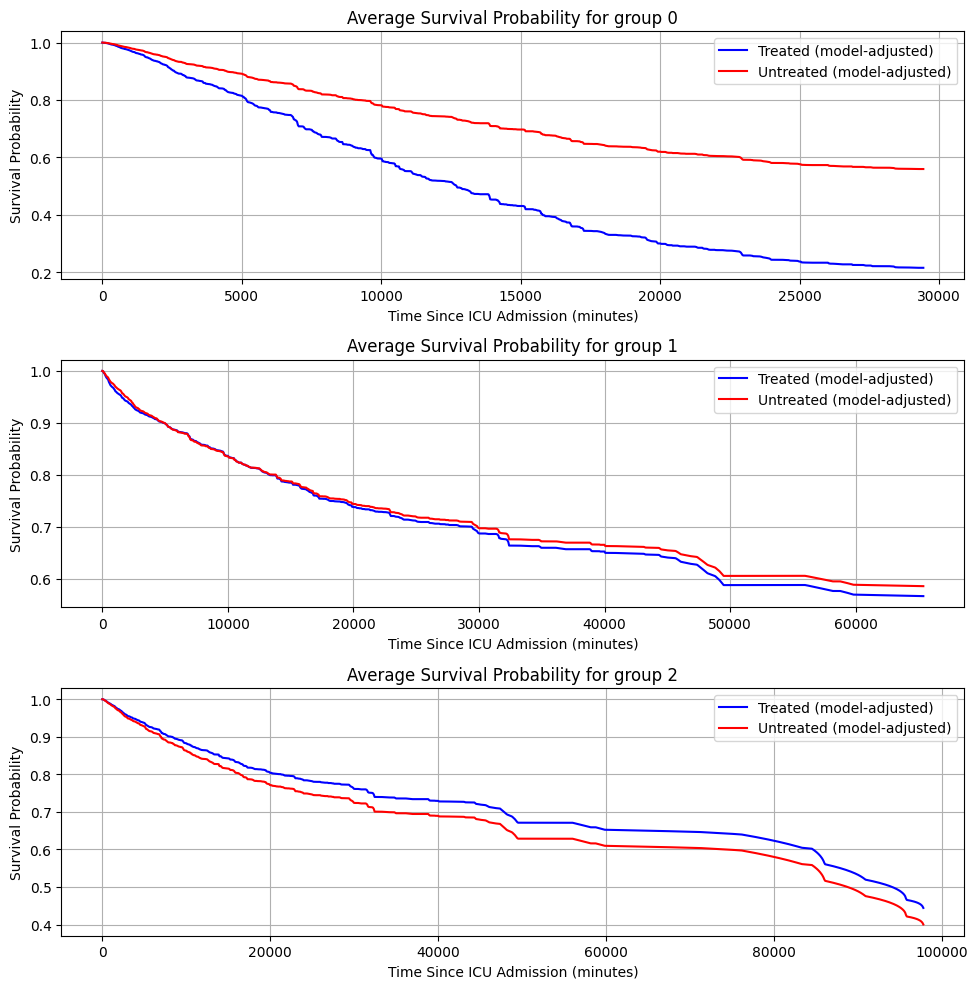

C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:58: RuntimeWarning: invalid value encountered in power
  return spl(ts)**risks
C:\My_Programs\Python_Project\Causal_Survival_Modeling\Test_Paper\helper_functions.py:464: RuntimeWarning: Mean of empty slice
  S1_avg = np.nanmean(S1, axis=0)
C:\My_Programs\Python_Project\Causal_Survival_Modeling\Test_Paper\helper_functions.py:465: RuntimeWarning: Mean of empty slice
  S0_avg = np.nanmean(S0, axis=0)


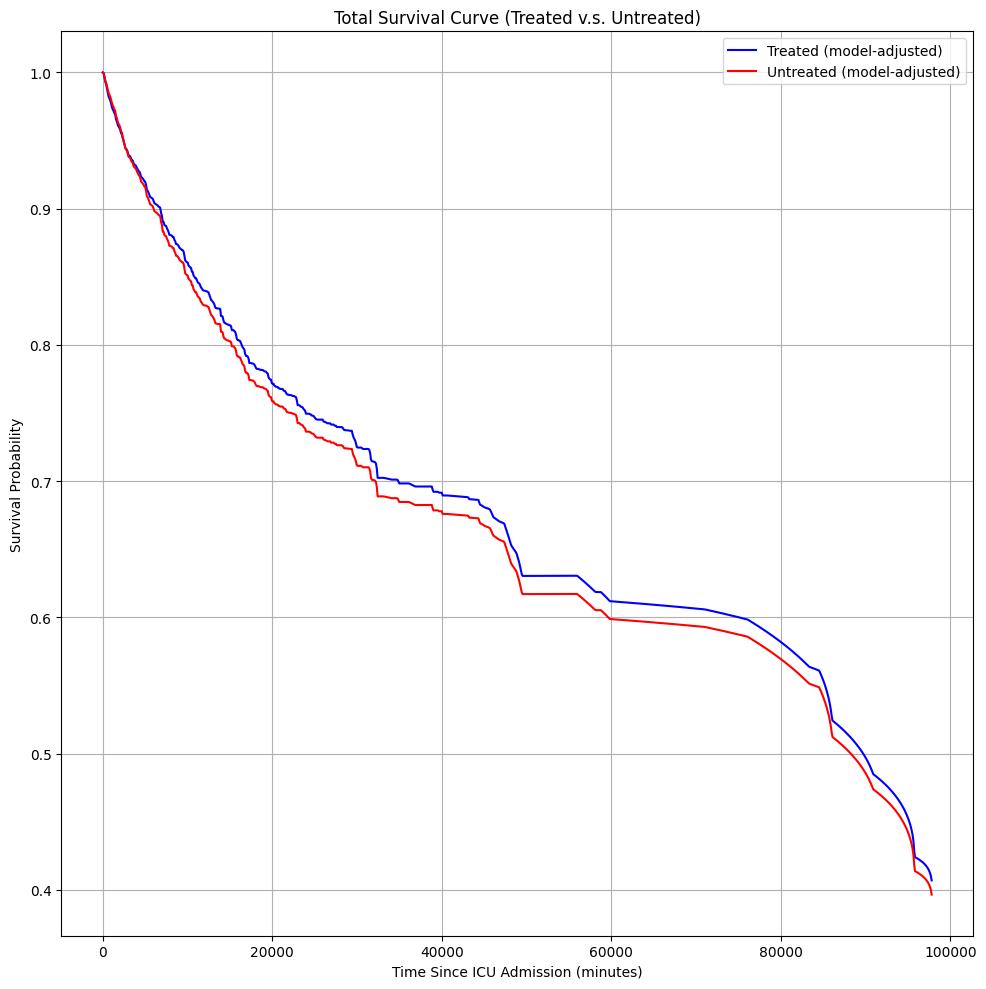

DCM model:
For group 0, the estimated causal effect: -6655.929154169933.
For group 1, the estimated causal effect: -667.6772487362468.
For group 2, the estimated causal effect: 3573.8689339856064.
Total estimated causal effect: [1150.7746754263062]


 10%|█         | 10/100 [00:06<00:55,  1.61it/s]


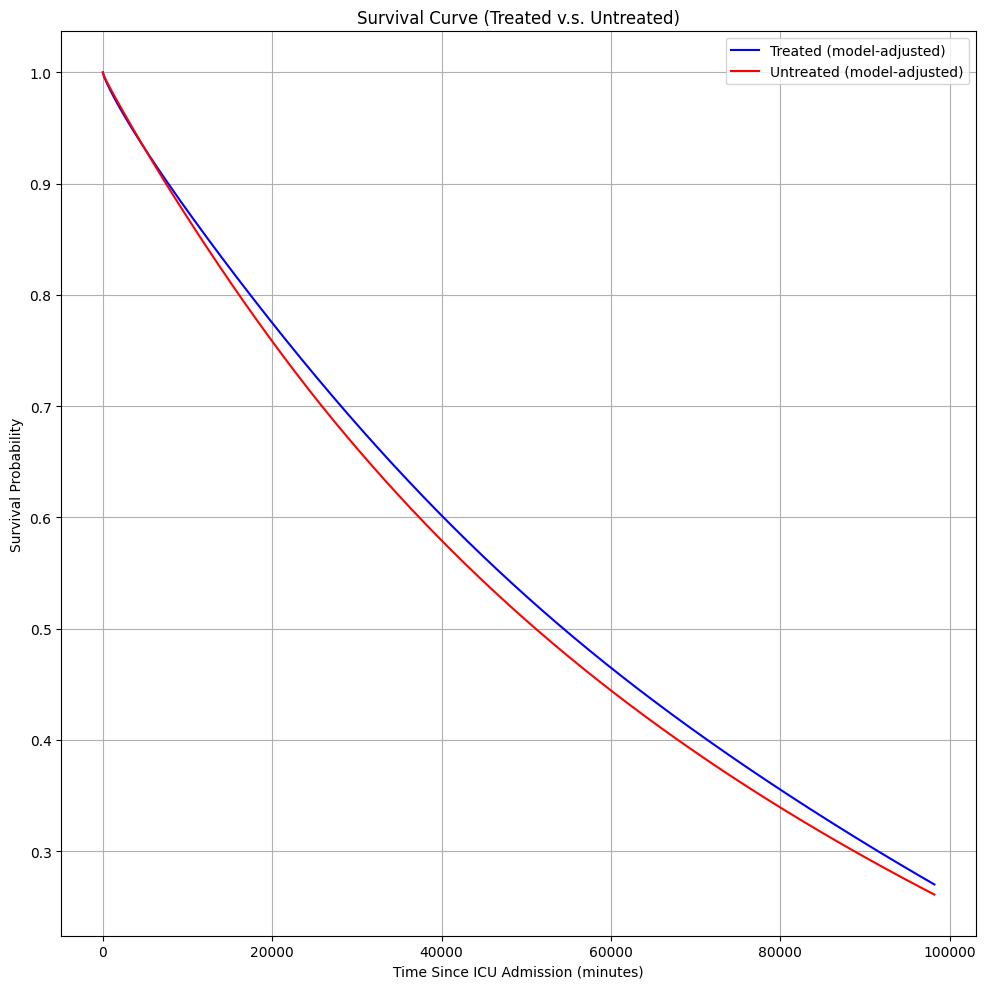

DSM model:  the estimated causal effect: [1579.691664714097].
****************************************
group 2, hospitalid: 148


  0%|          | 0/100 [00:00<?, ?it/s]C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:105: RuntimeWarning: invalid value encountered in log
  probs = gates+np.log(event_probs)
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:105: RuntimeWarning: divide by zero encountered in log
  probs = gates+np.log(event_probs)
  5%|▌         | 5/100 [00:34<11:31,  7.28s/it]C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:58: RuntimeWarning: invalid value encountered in power
  return spl(ts)**risks
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:53: RuntimeWarning: invalid value encountered in power
  s0ts = (-risks)*(spl(ts)**(risks-1))
 27%|██▋       | 27/100 [04:24<11:55,  9.81s/it]
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:58: RuntimeWarning: i

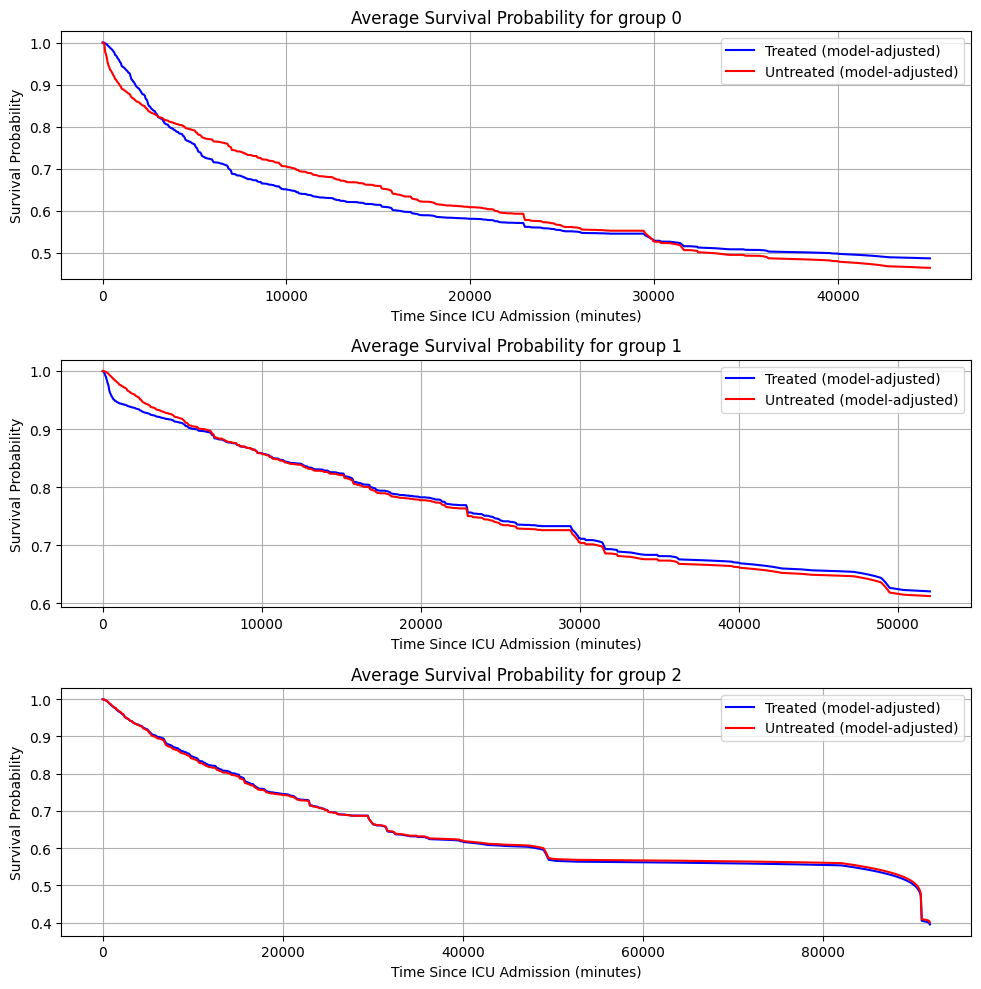

C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:58: RuntimeWarning: invalid value encountered in power
  return spl(ts)**risks
C:\My_Programs\Python_Project\Causal_Survival_Modeling\Test_Paper\helper_functions.py:464: RuntimeWarning: Mean of empty slice
  S1_avg = np.nanmean(S1, axis=0)
C:\My_Programs\Python_Project\Causal_Survival_Modeling\Test_Paper\helper_functions.py:465: RuntimeWarning: Mean of empty slice
  S0_avg = np.nanmean(S0, axis=0)


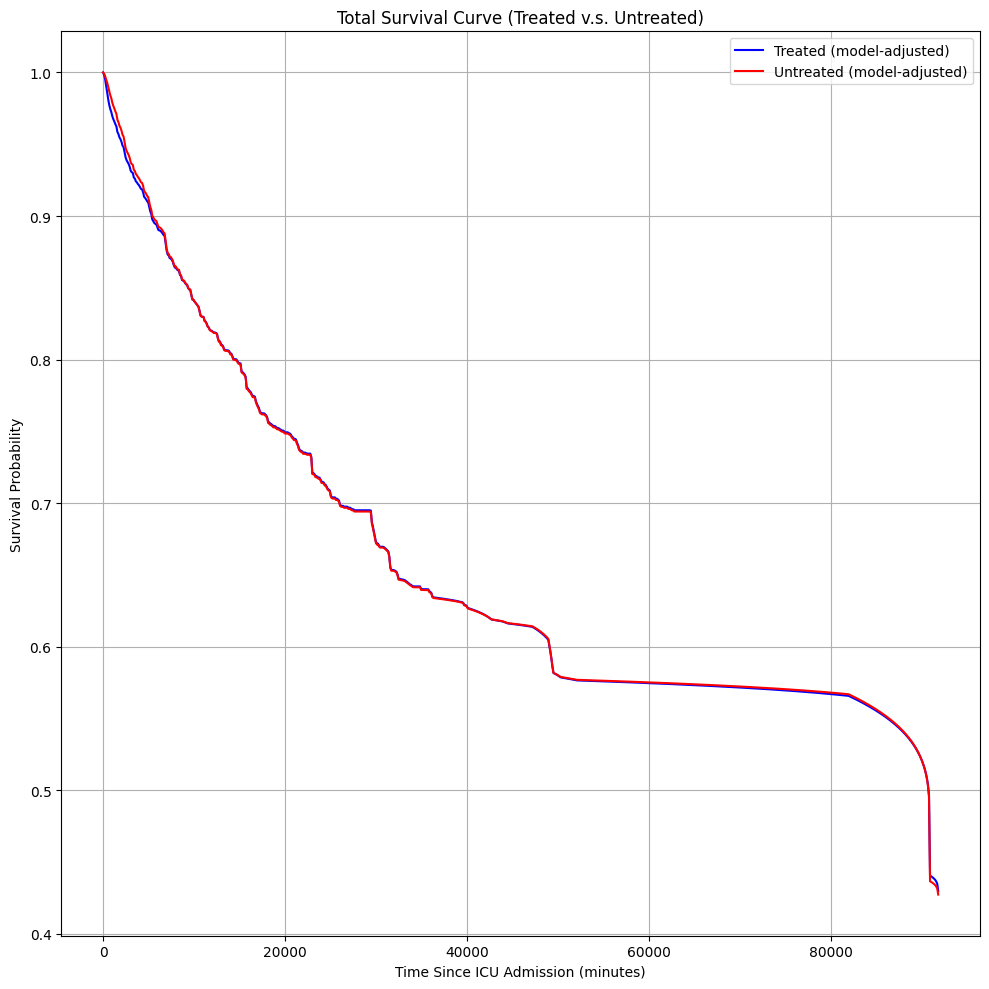

DCM model:
For group 0, the estimated causal effect: -517.9070052006464.
For group 1, the estimated causal effect: 163.00899761074834.
For group 2, the estimated causal effect: -204.56137338359258.
Total estimated causal effect: [-43.60542185714439]


 12%|█▏        | 12/100 [00:08<00:59,  1.47it/s]


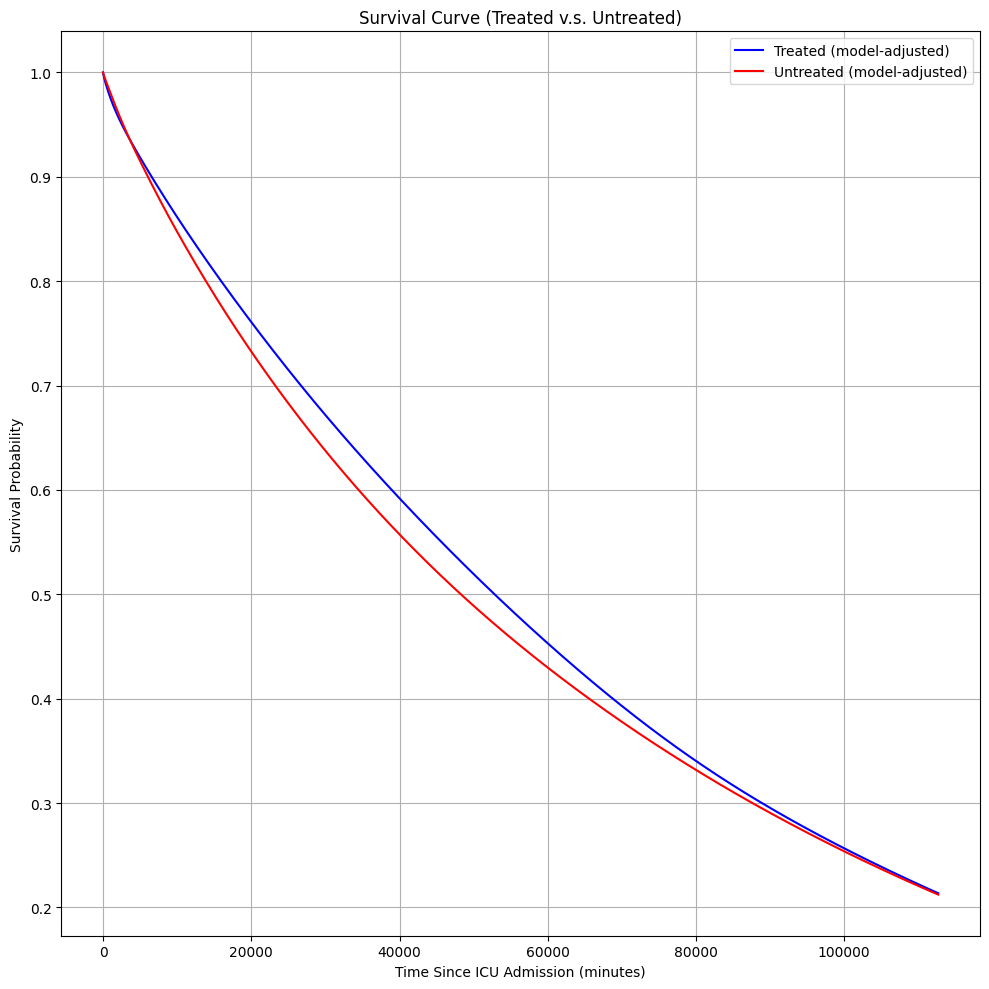

DSM model:  the estimated causal effect: [1956.6000464074023].
****************************************
group 3, hospitalid: 154


  0%|          | 0/100 [00:00<?, ?it/s]C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:105: RuntimeWarning: invalid value encountered in log
  probs = gates+np.log(event_probs)
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:105: RuntimeWarning: divide by zero encountered in log
  probs = gates+np.log(event_probs)
  5%|▌         | 5/100 [00:32<11:12,  7.08s/it]C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:58: RuntimeWarning: invalid value encountered in power
  return spl(ts)**risks
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:53: RuntimeWarning: invalid value encountered in power
  s0ts = (-risks)*(spl(ts)**(risks-1))
 27%|██▋       | 27/100 [04:04<11:00,  9.04s/it]
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:58: RuntimeWarning: i

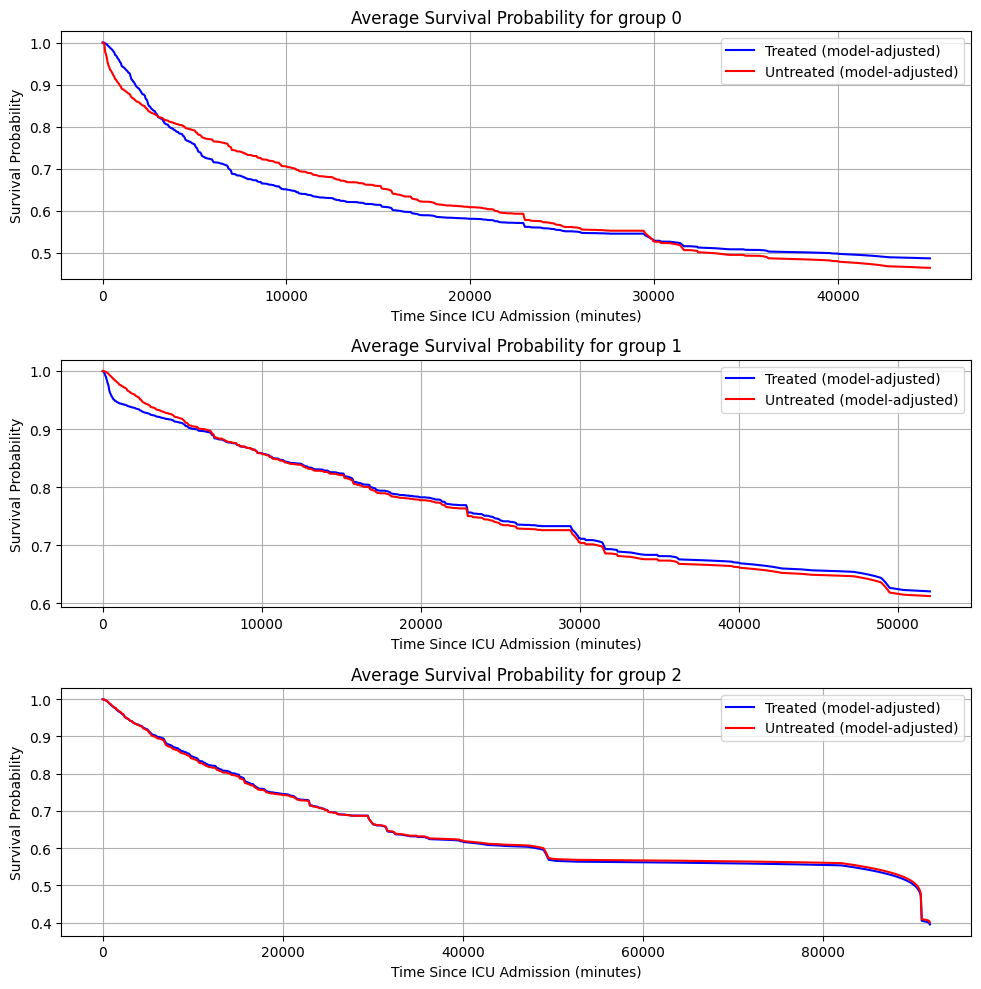

C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:58: RuntimeWarning: invalid value encountered in power
  return spl(ts)**risks
C:\My_Programs\Python_Project\Causal_Survival_Modeling\Test_Paper\helper_functions.py:464: RuntimeWarning: Mean of empty slice
  S1_avg = np.nanmean(S1, axis=0)
C:\My_Programs\Python_Project\Causal_Survival_Modeling\Test_Paper\helper_functions.py:465: RuntimeWarning: Mean of empty slice
  S0_avg = np.nanmean(S0, axis=0)


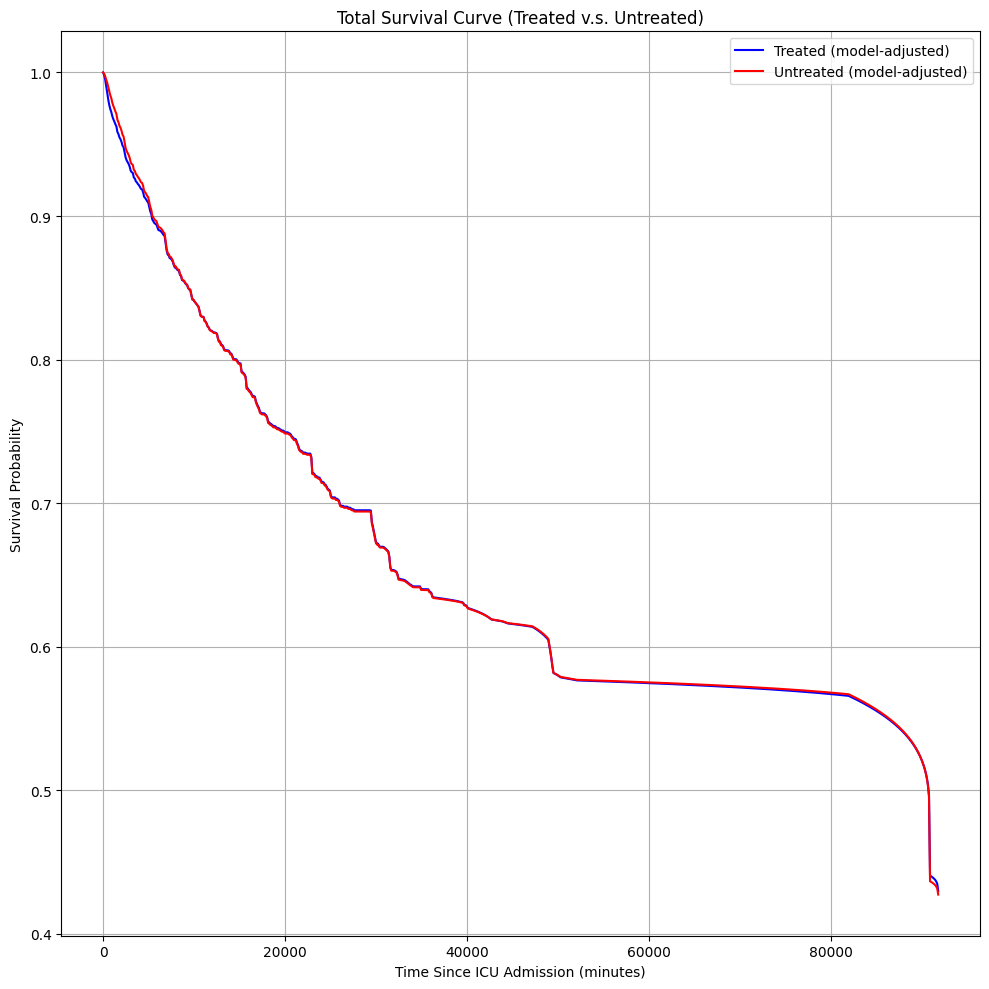

DCM model:
For group 0, the estimated causal effect: -517.9070052006464.
For group 1, the estimated causal effect: 163.00899761074834.
For group 2, the estimated causal effect: -204.56137338359258.
Total estimated causal effect: [-43.60542185714439]


 12%|█▏        | 12/100 [00:28<03:30,  2.39s/it]


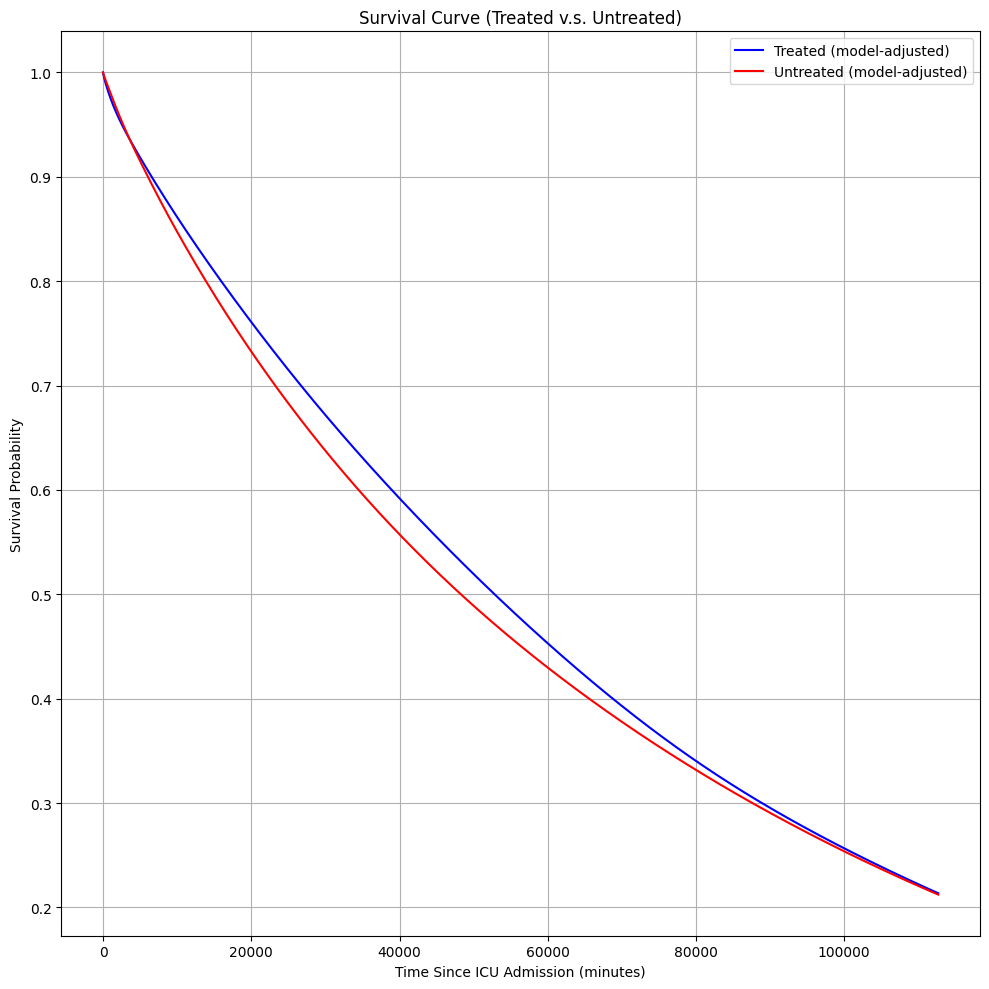

DSM model:  the estimated causal effect: [1956.6000464074023].
****************************************
group 4, hospitalid: 157


  0%|          | 0/100 [00:00<?, ?it/s]C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:105: RuntimeWarning: invalid value encountered in log
  probs = gates+np.log(event_probs)
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:105: RuntimeWarning: divide by zero encountered in log
  probs = gates+np.log(event_probs)
  5%|▌         | 5/100 [00:58<19:42, 12.45s/it]C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:58: RuntimeWarning: invalid value encountered in power
  return spl(ts)**risks
C:\My_Programs\Anaconda\envs\CSMDRMP\lib\site-packages\auton_survival\models\dcm\dcm_utilities.py:53: RuntimeWarning: invalid value encountered in power
  s0ts = (-risks)*(spl(ts)**(risks-1))
 15%|█▌        | 15/100 [03:11<17:45, 12.53s/it]

In [ ]:
index = 0
for group_names, df_group in grouped_multi:

    print("**" * 20)

    index = index + 1

    print(f"group {index}, hospitalid: {group_names}")


    # DCM
    X_data_DCM, t_data_DCM, e_data_DCM, categorical_features_list_DCM, numerical_features_list_DCM = (
        processing_data_2_DCM(df=cleaned_df,
                              categorical_features_list=categorical_features,
                              train_test_val_size=(0.7, 0.2, 0.1),
                              random_seed=RANDOM_SEED,
                              clustering=False,  # No need to cluster
                              )
    )

    X_train_DCM, X_val_DCM, X_test_DCM = X_data_DCM
    t_train_DCM, t_val_DCM, t_test_DCM = t_data_DCM
    e_train_DCM, e_val_DCM, e_test_DCM = e_data_DCM

    whole_X_set_DCM = pd.concat([X_train_DCM, X_val_DCM, X_test_DCM], axis=0)
    whole_t_set_DCM = pd.concat([t_train_DCM, t_val_DCM, t_test_DCM], axis=0)
    whole_e_set_DCM = pd.concat([e_train_DCM, e_val_DCM, e_test_DCM], axis=0)

    covariates_DCM = list(whole_X_set_DCM.columns)

    # Resample data with IPTW
    df_ps_DCM = pd.concat([whole_X_set_DCM, treatment], axis=1)

    df_ps_DCM = compute_PS_and_IPTW(df=df_ps_DCM,
                                covariates=covariates_DCM,
                                treatment="treatment")

    prob_DCM = df_ps_DCM["iptw_weight"] / df_ps_DCM["iptw_weight"].sum()

    resampled_indices_DCM = np.random.choice(len(df_ps_DCM), size=len(df_ps_DCM), replace=True, p=prob_DCM)

    x_resampled_DCM = whole_X_set_DCM.values[resampled_indices_DCM]
    t_resampled_DCM = whole_t_set_DCM.values[resampled_indices_DCM]
    e_resampled_DCM = whole_e_set_DCM.values[resampled_indices_DCM]
    treatment_resampled_DCM = treatment.values[resampled_indices_DCM]

    x_resampled_df_DCM = pd.DataFrame(x_resampled_DCM, columns=whole_X_set_DCM.columns)
    t_resampled_df_DCM = pd.DataFrame(t_resampled_DCM, columns=["time"])
    e_resampled_df_DCM = pd.DataFrame(e_resampled_DCM, columns=["event"])
    treatment_resampled_df_DCM = pd.DataFrame(treatment_resampled_DCM, columns=["treatment"])

    df_resampled_DCM = pd.concat([x_resampled_df_DCM,
                             t_resampled_df_DCM,
                             e_resampled_df_DCM,
                             treatment_resampled_df_DCM],
                            axis=1
                            )
    # DCM hyper-parameters
    DCM_param_grid = {"k" : [3],
                      "learning_rate" : [1e-3],
                      "layers": [[50, 50]],
                      "iters": [100]
                 }
    DCM_params = ParameterGrid(DCM_param_grid)

    # Define and train DCM model
    dcm_wrap = DCM_Wrapper(DCM_params)

    dcm_wrap.fit(train_set=[df_resampled_DCM[covariates_DCM],
                            df_resampled_DCM["time"],
                            df_resampled_DCM["event"]]
                 )
    dcm_model = dcm_wrap.model

    train_latent_DCM = dcm_model.predict_latent_z(df_resampled_DCM[covariates_DCM])

    train_group_DCM = np.argmax(train_latent_DCM, axis=1)

    dcm_causal_effects_latent = plot_avg_survival_curve(df=df_resampled_DCM,
                                                        group_index=train_group_DCM,
                                                        model_wrapper=dcm_wrap,
                                                        covariates=covariates_DCM,
                                                        treatment="treatment",
                                                        num_time=1000
                                                        )

    dcm_causal_effects_total = plot_avg_survival_curve(df=df_resampled_DCM,
                                                       group_index=np.zeros_like(train_group_DCM),
                                                       model_wrapper=dcm_wrap,
                                                       covariates=covariates_DCM,
                                                       treatment="treatment",
                                                       num_time=1000,
                                                       given_title="Total Survival Curve (Treated v.s. Untreated)"
                                                       )
    print(f"DCM model:")
    for i, ce in enumerate(dcm_causal_effects_latent):
        print(f"For group {i}, the estimated causal effect: {ce}.")

    print(f"Total estimated causal effect: {dcm_causal_effects_total}")

    # DSM
    df_resampled_DSM = df_resampled_DCM
    covariates_DSM = covariates_DCM

    # DSM hyper-parameters
    DSM_param_grid = {"distribution": ["Weibull"],
                      "k": [3],
                      "layers": [[50, 50]],
                      "learning_rate": [1e-3],
                      "iters": [100]
                 }
    DSM_params = ParameterGrid(DSM_param_grid)

    # Define and train DCM model
    dsm_wrap = DSM_Wrapper(DSM_params)

    dsm_wrap.fit(train_set=[df_resampled_DSM[covariates_DSM],
                            df_resampled_DCM["time"],
                            df_resampled_DSM["event"]]
                 )

    dsm_causal_effects = plot_avg_survival_curve(df=df_resampled_DSM,
                                             group_index=np.zeros_like(train_group_DCM),
                                             model_wrapper=dsm_wrap,
                                             covariates=covariates_DSM,
                                             treatment="treatment",
                                             num_time=1000,
                                             given_title="Survival Curve (Treated v.s. Untreated)"
                                             )
    print(f"DSM model:  the estimated causal effect: {dsm_causal_effects}.")